# Con Librerias Librerias

In [ ]:
import numpy as np
import struct
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Función para cargar imágenes
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num_images, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num_images, rows, cols)
    return images

# Función para cargar etiquetas
def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num_labels = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Normalizar las imágenes (0-255 a 0-1)
def normalize_images(images):
    return images / 255.0

# Convertir las imágenes a formato (num_imagenes, 28, 28, 1)
def expand_dims(images):
    return np.expand_dims(images, axis=-1)

# Convertir etiquetas a formato one-hot
def to_categorical(labels, num_classes):
    return np.eye(num_classes)[labels]

# Cargar y preprocesar los datos
train_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/train-images.idx3-ubyte')
train_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/train-labels.idx1-ubyte')
test_images = load_images('/content/drive/MyDrive/Colab Notebooks/IC/t10k-images.idx3-ubyte')
test_labels = load_labels('/content/drive/MyDrive/Colab Notebooks/IC/t10k-labels.idx1-ubyte')

# Normalizar las imágenes
train_images = normalize_images(expand_dims(train_images))
test_images = normalize_images(expand_dims(test_images))

# Convertir las etiquetas a formato one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Definir el modelo
model = models.Sequential()

# Primera capa convolucional con MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional con MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Tercera capa convolucional con MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplanar las salidas de la última capa convolucional
model.add(layers.Flatten())

# Capa completamente conectada (densa)
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (para cada clase) y activación softmax
model.add(layers.Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Definir EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_split=0.2, callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Loss en el conjunto de test: {test_loss}')
print(f'Precisión en el conjunto de test: {test_acc}')

# Realizar predicciones con el modelo entrenado
predictions = model.predict(test_images)

# Ver las primeras 5 predicciones
print(np.argmax(predictions[:5], axis=1))
print(np.argmax(test_labels[:5], axis=1))  # Etiquetas verdaderas


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.8604 - loss: 0.4751 - val_accuracy: 0.9797 - val_loss: 0.0686
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.9824 - loss: 0.0577 - val_accuracy: 0.9833 - val_loss: 0.0590
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9871 - loss: 0.0400 - val_accuracy: 0.9888 - val_loss: 0.0419
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9911 - loss: 0.0277 - val_accuracy: 0.9869 - val_loss: 0.0443
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9873 - val_loss: 0.0446
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9902 - val_loss: 0.0387
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9901 - val_loss: 0.0385
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9954 - loss: 0.0141 - 

# Red Convolucional - Librerias

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.8187 - loss: 0.6826 - val_accuracy: 0.9151 - val_loss: 0.3371 - learning_rate: 0.0010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 58ms/step - accuracy: 0.9701 - loss: 0.1731 - val_accuracy: 0.9888 - val_loss: 0.1120 - learning_rate: 0.0010
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9776 - loss: 0.1483 - val_accuracy: 0.9918 - val_loss: 0.1013 - learning_rate: 0.0010
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9818 - loss: 0.1384 - val_accuracy: 0.9940 - val_loss: 0.0950 - learning_rate: 0.0010
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9825 - loss: 0.1338 - val_accuracy: 0.9879 - val_loss: 0.1108 - learning_rate: 0.0010
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9849 - loss: 0.1232 - val_accuracy: 0.9905 - val_loss: 0.1008 - learning_rate: 0.0010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9

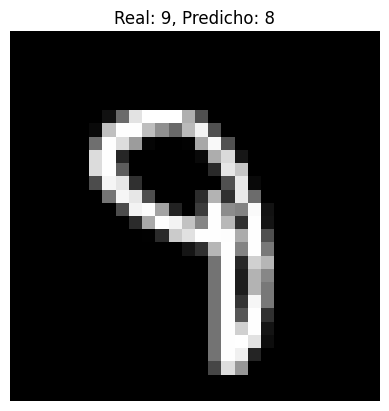

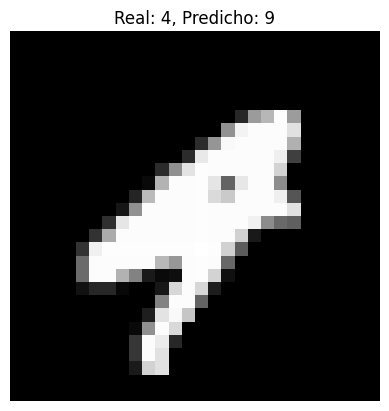

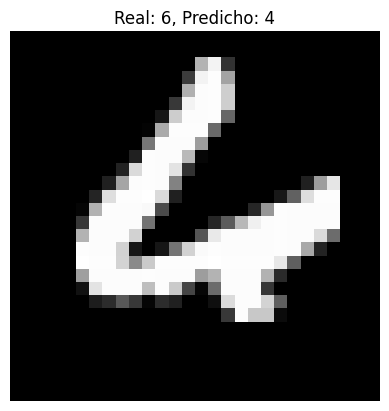

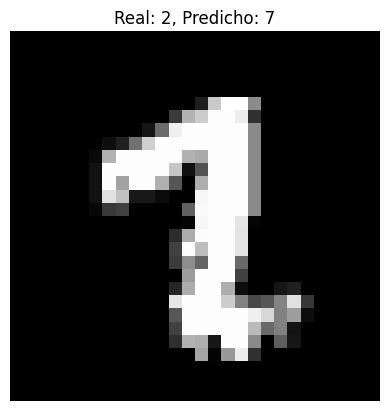

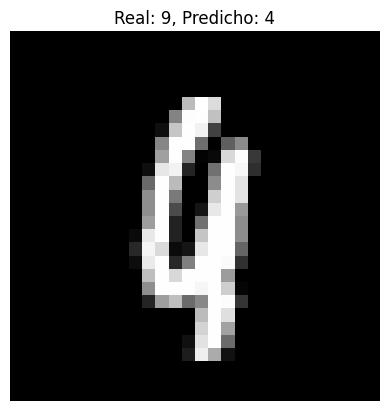

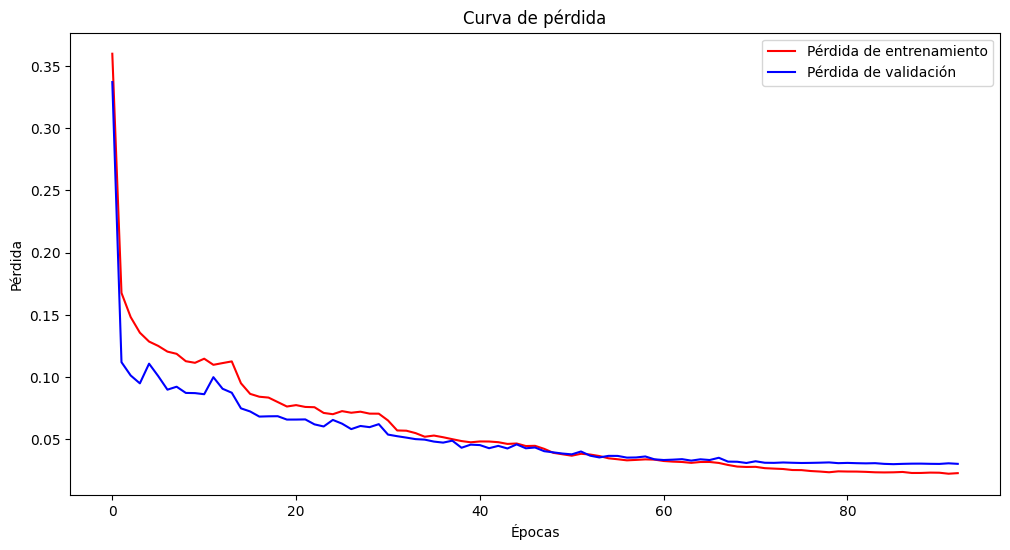

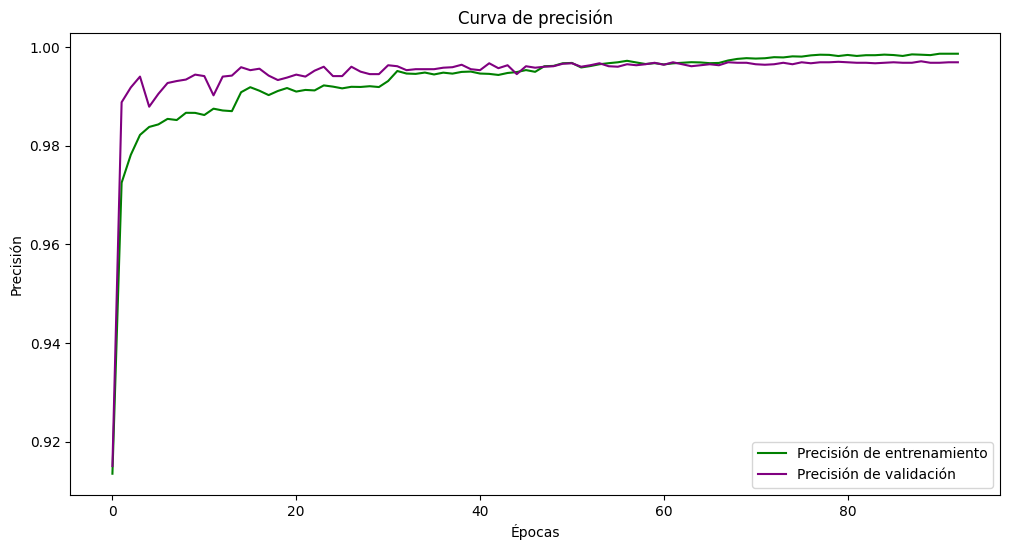

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Descargar MNIST directamente desde TensorFlow
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalizar y redimensionar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convertir etiquetas a formato one-hot
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(train_images)

# Definir el modelo optimizado
def build_advanced_model():
    model = models.Sequential()

    # Entrada explícita
    model.add(layers.Input(shape=(28, 28, 1)))

    # Primer bloque convolucional
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    # Segundo bloque convolucional
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Tercer bloque convolucional
    model.add(layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.GlobalAveragePooling2D())

    # Capa densa
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Capa de salida
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_advanced_model()

# Compilar el modelo con AdamW
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejorar el rendimiento
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Entrenar el modelo
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=128, shuffle=True),
    epochs=100,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot)

print(f'Loss en el conjunto de test: {test_loss}')
print(f'Precisión en el conjunto de test: {test_acc}')

# Calcular tasa de error sobre el conjunto de entrenamiento
train_accuracy = history.history['accuracy'][-1]
error_rate_train = 100 - train_accuracy * 100
print(f"Tasa de error en el conjunto de entrenamiento: {error_rate_train:.2f}%")

# Generar etiquetas asignadas a los casos del conjunto de prueba
predictions = model.predict(test_images)
assigned_labels = np.argmax(predictions, axis=1)

# Mostrar las etiquetas asignadas como una única lista
print("Etiquetas asignadas a los casos del conjunto de prueba:")
print("".join(map(str, assigned_labels)))

# Calcular el total de imágenes mal clasificadas
misclassified_indices = np.where(assigned_labels != np.argmax(test_labels_one_hot, axis=1))[0]
print(f"Total de imágenes mal clasificadas: {len(misclassified_indices)}")


# Mostrar las primeras 5 imágenes mal clasificadas
for i in range(min(5, len(misclassified_indices))):
    idx = misclassified_indices[i]
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {np.argmax(test_labels[idx])}, Predicho: {np.argmax(predictions[idx])}")
    plt.axis('off')
    plt.show()

# Graficar la curva de pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='red')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='blue')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento', color='green')
plt.plot(history.history['val_accuracy'], label='Precisión de validación', color='purple')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Total de imágenes mal clasificadas: 37


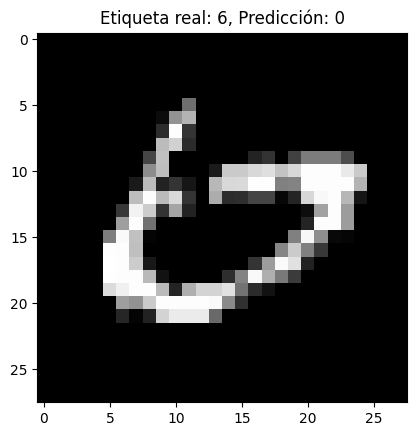

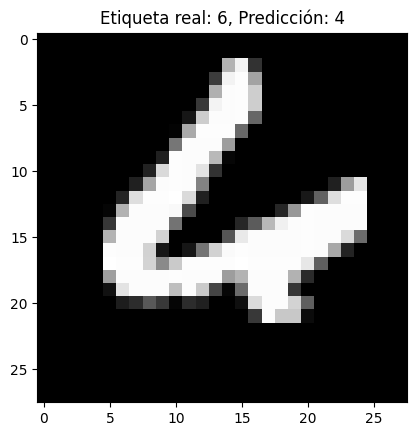

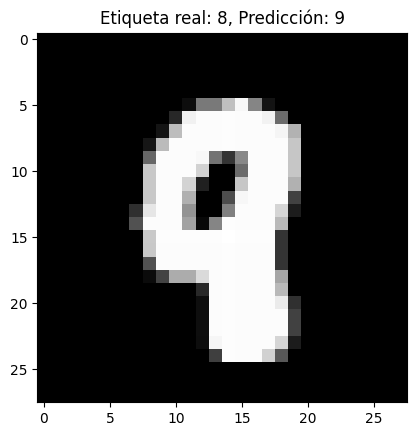

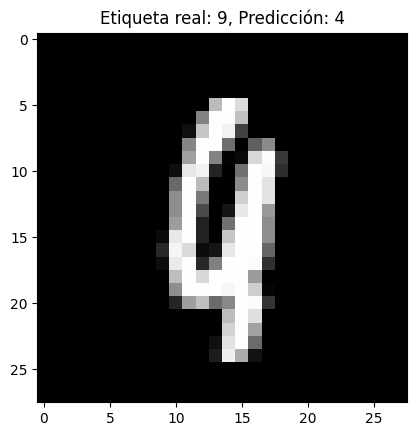

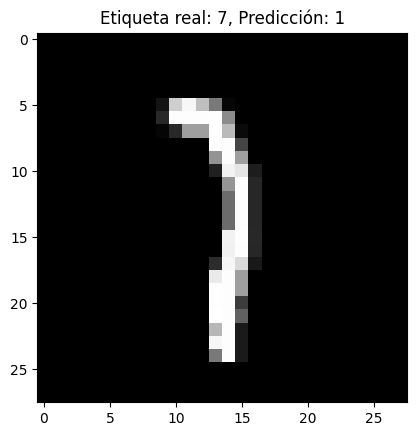

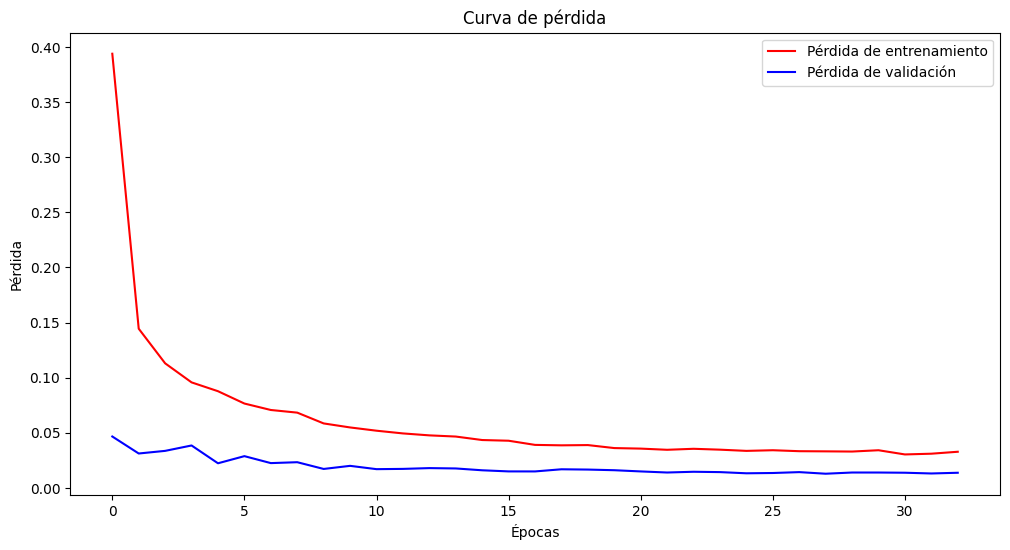

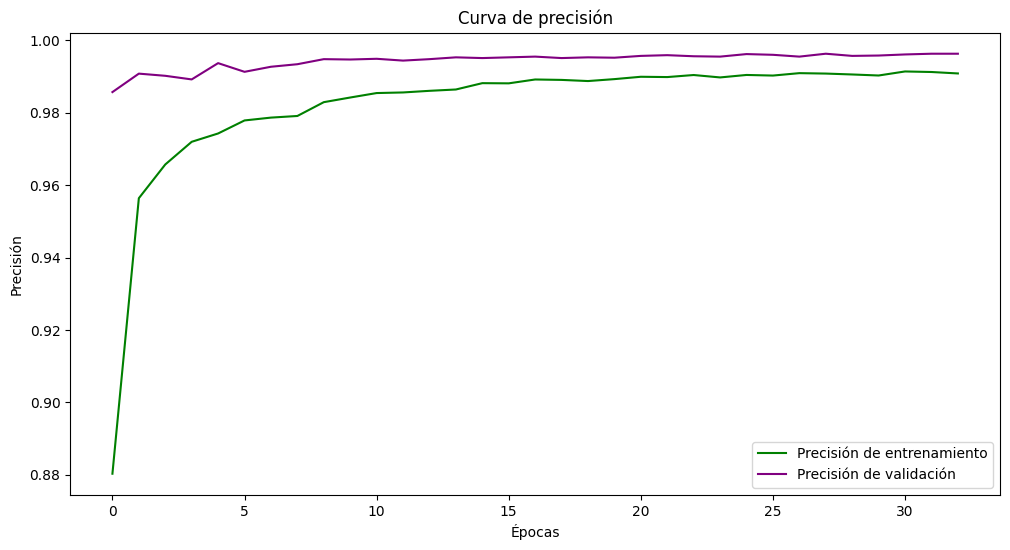

In [ ]:
# Predicciones y análisis de los errores
predictions = model.predict(test_images)

# Identificar las imágenes que el modelo ha fallado
misclassified_images = []
misclassified_labels = []
predicted_labels = []

for i in range(len(test_images)):
    if np.argmax(predictions[i]) != np.argmax(test_labels[i]):
        misclassified_images.append(test_images[i])
        misclassified_labels.append(np.argmax(test_labels[i]))
        predicted_labels.append(np.argmax(predictions[i]))

# Mostrar las imágenes mal clasificadas
print(f"Total de imágenes mal clasificadas: {len(misclassified_images)}")
for i in range(min(5, len(misclassified_images))):  # Mostrar solo las primeras 5 imágenes mal clasificadas
    plt.imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Etiqueta real: {misclassified_labels[i]}, Predicción: {predicted_labels[i]}")
    plt.show()

# Graficar la curva de pérdida y precisión
plt.figure(figsize=(12, 6))

# Pérdida
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='red')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='blue')
plt.title('Curva de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Precisión
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento', color='green')
plt.plot(history.history['val_accuracy'], label='Precisión de validación', color='purple')
plt.title('Curva de precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()